# Naïve Bayes Classifier

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. 

## Import Libraries

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Load the data from CSV file

In [2]:
cust = pd.read_csv('data/telco_customer_churn.csv')

In [4]:
display(HTML(cust.head().to_html()))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the Column Types

In [5]:
cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Convert String labels to Numeric

In [6]:
cust['Churn'] = np.where(cust['Churn']=='Yes',1,0)

### Select features to Train the model

In [7]:
cust = cust[['gender','MonthlyCharges','tenure','Churn']]

### Split the data set into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cust.drop(columns = ['Churn'], axis=1), cust['Churn'], test_size=0.2, random_state=2018, shuffle=True)

### Encode the categorical variables

In [10]:
print(X_train.shape)
print(X_test.shape)

(5634, 3)
(1409, 3)


In [11]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [12]:
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


### Naive Bayes Classifier

In [13]:
naiveb = GaussianNB()
naiveb = naiveb.fit(X_train, y_train)

In [14]:
naiveb

GaussianNB(priors=None)

### Predict on the Test dataset using the Trained model

In [15]:
pred_test = naiveb.predict(X_test)
pred_test_prob = naiveb.predict_proba(X_test)

### Evaluate the model performance

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

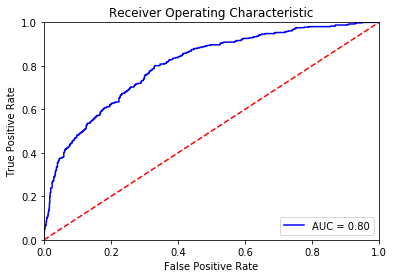

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Area Under the Curve (AUC)

In [31]:
print('AUC', round(metrics.roc_auc_score(y_test, pred_test_prob[:,1]),2))

AUC 0.8


#### Overall Accuracy

In [30]:
print('Overall Accuracy', round(metrics.accuracy_score(y_test, pred_test),2))

Overall Accuracy 0.78


In [36]:
confmat = metrics.confusion_matrix(y_test, pred_test)
confmat

array([[935,  67],
       [237, 170]], dtype=int64)

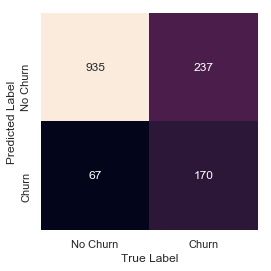

In [43]:
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');